### Basics Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [26]:
# topics_df = pd.read_csv('data/train_data.csv')

train_data = pd.read_csv("data/train_data.csv")
test_data = pd.read_csv("data/unseen_test_data.csv")

# Add a flag column to identify train and test data
train_data['is_train'] = 1
test_data['is_train'] = 0

# Merge train and test data
topics_df = pd.concat([train_data, test_data], ignore_index=True)

print(f"Num of train data: {topics_df[topics_df['is_train'] == 1].shape[0]}")
print(f"Num of test data: {topics_df[topics_df['is_train'] == 0].shape[0]}")

Num of train data: 2498
Num of test data: 713


In [3]:
print(f"Num or rows {topics_df.shape[0]}")
print(f"Num columns {topics_df.shape[1]} with columns {list(topics_df.columns)}")
print(f" Num of unique labels: {topics_df['label'].nunique()}")
topics_df.head()

Num or rows 3211
Num columns 5 with columns ['url', 'title', 'content', 'label', 'is_train']
 Num of unique labels: 21


,url,title,content,label,is_train
0,https://www.platform.gr/life-2/fashion/75668-d...,Δες εδώ τις ολοκαίνουργιες μάσκες προστασίας α...,Οι συνεισφορές θα διατεθούν στο Κοινοτικό Ταμε...,Style&Fashion,1
1,https://www.protothema.gr/greece/article/96354...,"Φλώρινα: Έκρυβε χασίς, χάπια και άγνωστη ουσία...",Δείτε βίντεο Η στιγμή της ισχυρότατης έκρηξης ...,Sensitive Topics,1
2,https://www.vimaorthodoxias.gr/ekklisia-tis-el...,Άνω κάτω στην Εκκλησία της Ελλάδος για το συλλ...,Η απάντηση ήρθε λίγη ώρα αργότερα από τον Μητρ...,Religion&Spirituality,1
3,http://physics4u.gr/blog/2018/07/13/%ce%bf-%cf...,Ο σπειροειδής ραβδωτός Γαλαξίας μας,Ο Γαλαξίας μας αποτελείται κυρίως από ένα πυρή...,Science,1
4,https://www.tilestwra.com/pos-akougete-o-ichos...,Πώς ακούγεται ο ήχος έναρξης των Windows XP 80...,Πολλοί άνθρωποι αναγνωρίζουν αμέσως τον ήχο έν...,Viral Articles,1


In [4]:
nan_content = topics_df['content'].isna().sum()
nan_title = topics_df['title'].isna().sum()

print("Number of NaN values in 'content' column:", nan_content)
print("Number of NaN values in 'title' column:", nan_title)



Number of NaN values in 'content' column: 0
Number of NaN values in 'title' column: 0


## Some *Explorations*

<Axes: xlabel='label'>

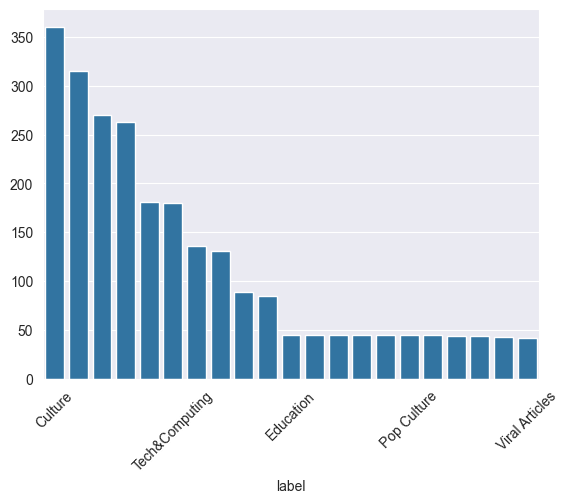

In [5]:
# for train 

label_value_counts = topics_df.loc[topics_df['is_train'] == 1, 'label'].value_counts()
label_value_counts = label_value_counts.head(21)
labels_barplot = sns.barplot(x=label_value_counts.index, y=label_value_counts.values)
for i, label in enumerate(labels_barplot.xaxis.get_ticklabels()):
    if i % 5 != 0:
        label.set_visible(False)
plt.xticks(rotation=45)
labels_barplot

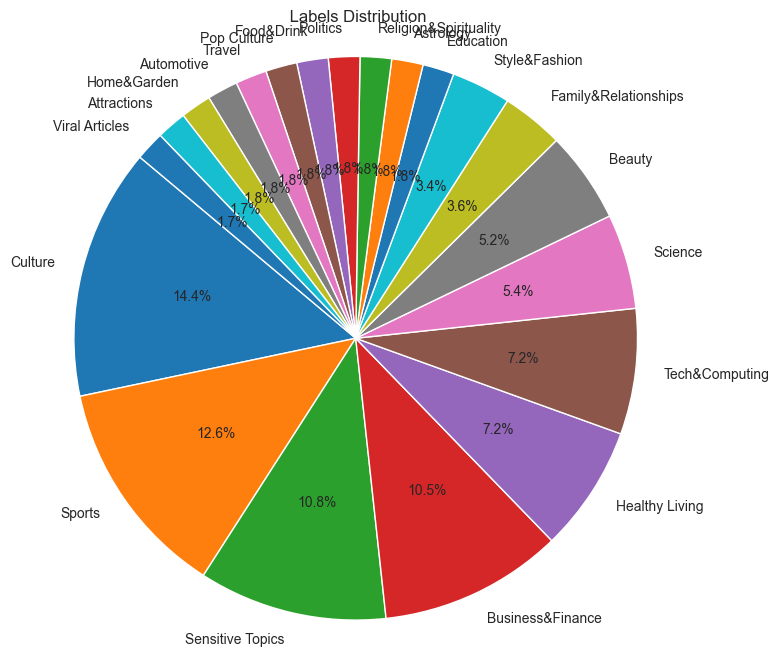

In [6]:
import matplotlib.pyplot as plt
label_value_counts = label_value_counts.head(21)

# Assuming you have top_tags as a pandas Series
plt.figure(figsize=(8, 8))
plt.pie(label_value_counts , labels=label_value_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title(' Labels Distribution')
plt.show()


In [7]:
topics_df.to_csv('data/merged_data.csv')

## Sanitizing Text!


*   Remove HTML tags
*   Remove Punctuation
*   Remove Stopwords
*   Lemmatize Text
*   Tokenize Text


In [27]:
import spacy
import nltk
from nltk import WordNetLemmatizer
from nltk.corpus import stopwords
import string
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup
from langdetect import detect 
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
!pip install lxml
nlp_gr = spacy.load("el_core_news_sm")
stop_words_gr = set(nltk.corpus.stopwords.words('greek'))
stop_words_en = set(stopwords.words('english'))



def tokenize_text_gr(text):
    doc = nlp_gr(text)
    tokenized_text = [token.text for token in doc]
    return tokenized_text

def lemmatize_text_gr(text):
    doc = nlp_gr(text)
    lemmatized_text = " ".join([token.lemma_ for token in doc])
    return lemmatized_text



def remove_stopwords_gr(words):
    words = word_tokenize(words)
    filtered_words = [word for word in words if word.lower() not in stop_words_gr]
    return ' '.join(filtered_words)

def lowercase_text(text):
    return text.lower()

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))


def lemmatize_text_en(text):
    # Initialize lemmatizer
    lemmatizer = WordNetLemmatizer()
    # Tokenize text into words
    words = nltk.word_tokenize(text)
    lemmatized_text = ' '.join([lemmatizer.lemmatize(word) for word in words])
    return lemmatized_text

def lemmatize_text(text):
    language = detect(text)
    lemmatized_words = text
    if language == 'en':
        lemmatized_words = lemmatize_text_en(text)
    elif language == 'el':
        lemmatized_words = lemmatize_text_gr(text)

    return lemmatized_words

def remove_html_tags(text):
    return BeautifulSoup(text, "html.parser").get_text()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yvariozidis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yvariozidis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\yvariozidis\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
from tqdm import tqdm
tqdm.pandas()
#topics_df = pd.read_csv('data/merged_data.csv')

df_clean = topics_df

df_clean['title'] = df_clean['title'].str.replace('«', '').str.replace('»', '')
df_clean['content'] = df_clean['content'].str.replace('«', '').str.replace('»', '')

df_clean['title'] = df_clean['title'].str.replace('‘', '').str.replace('’','')
df_clean['content'] = df_clean['content'].str.replace('‘', '').str.replace('’','')



print('Removing Html tags')
df_clean['content'] = df_clean['content'].progress_apply(remove_html_tags)

print('Converting to Lowercase')
df_clean['title'] = df_clean['title'].progress_apply(lowercase_text)
df_clean['content'] = df_clean['content'].progress_apply(lowercase_text)

print('Removing Punctuation')
df_clean['title'] =df_clean['title'].progress_apply(remove_punctuation)
df_clean['content'] =df_clean['content'].progress_apply(remove_punctuation)


print('Removing Stopwords')
df_clean['title'] =df_clean['title'].progress_apply(remove_stopwords_gr)
df_clean['content'] =df_clean['content'].progress_apply(remove_stopwords_gr)

Removing Html tags


 48%|████▊     | 1554/3211 [00:00<00:00, 15534.31it/s]C:\Users\yvariozidis\AppData\Local\Temp\ipykernel_9564\3694713493.py:62: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(text, "html.parser").get_text()
100%|██████████| 3211/3211 [00:00<00:00, 15896.03it/s]


Converting to Lowercase


100%|██████████| 3211/3211 [00:00<00:00, 55371.32it/s]


Removing Punctuation


100%|██████████| 3211/3211 [00:00<00:00, 6259.20it/s]


Removing Stopwords


100%|██████████| 3211/3211 [00:03<00:00, 914.56it/s] 


In [29]:
df_clean = df_clean[df_clean['content'].notna() & (df_clean['content'] != '')]


print("Applying Lemmatization") 
df_clean['title'] =df_clean['title'].progress_apply(lemmatize_text)
df_clean['content'] =df_clean['content'].progress_apply(lemmatize_text)

Applying Lemmatization


100%|██████████| 3210/3210 [00:22<00:00, 140.69it/s]
C:\Users\yvariozidis\AppData\Local\Temp\ipykernel_9564\521510083.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['title'] =df_clean['title'].progress_apply(lemmatize_text)
100%|██████████| 3210/3210 [02:01<00:00, 26.52it/s]
C:\Users\yvariozidis\AppData\Local\Temp\ipykernel_9564\521510083.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['content'] =df_clean['content'].progress_apply(lemmatize_text)


In [30]:

print("Applying Tokenization")
df_clean['title_tokenized'] =df_clean['title'].progress_apply(tokenize_text_gr)
df_clean['content_tokenized'] =df_clean['content'].progress_apply(tokenize_text_gr)

df_clean.head()

Applying Tokenization


100%|██████████| 3210/3210 [00:18<00:00, 170.39it/s]
C:\Users\yvariozidis\AppData\Local\Temp\ipykernel_9564\2961986710.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['title_tokenized'] =df_clean['title'].progress_apply(tokenize_text_gr)
100%|██████████| 3210/3210 [01:30<00:00, 35.59it/s]
C:\Users\yvariozidis\AppData\Local\Temp\ipykernel_9564\2961986710.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['content_tokenized'] =df_clean['content'].progress_apply(tokenize_text_gr)


,url,title,content,label,is_train,title_tokenized,content_tokenized
0,https://www.platform.gr/life-2/fashion/75668-d...,δα εδώ ολοκαίνουργιος μάσκα προστασία από covi...,συνεισφορός διατεθώ κοινοτικός ταμείο burberry...,Style&Fashion,1,"[δα, εδώ, ολοκαίνουργιος, μάσκα, προστασία, απ...","[συνεισφορός, διατεθώ, κοινοτικός, ταμείο, bur..."
1,https://www.protothema.gr/greece/article/96354...,φλώρινα έκρυβε χασίςς χάπια άγνωστη ουσία σπίτι,δείτε βίντεο στιγμή ο ισχυρότατος έκρηξη κάβας...,Sensitive Topics,1,"[φλώρινα, έκρυβε, χασίςς, χάπια, άγνωστη, ουσί...","[δείτε, βίντεο, στιγμή, ο, ισχυρότατος, έκρηξη..."
2,https://www.vimaorthodoxias.gr/ekklisia-tis-el...,άνω κάτω εκκλησία ο ελλάδος συλλαλητήριοαναβρα...,απάντηση ήρθε λίγη ώρα αργά από μητροπολίτος θ...,Religion&Spirituality,1,"[άνω, κάτω, εκκλησία, ο, ελλάδος, συλλαλητήριο...","[απάντηση, ήρθε, λίγη, ώρα, αργά, από, μητροπο..."
3,http://physics4u.gr/blog/2018/07/13/%ce%bf-%cf...,σπειροειδή ραβδωτός γαλαξία μου,γαλαξία μου αποτελείται κυρίως από ένας πυρήνα...,Science,1,"[σπειροειδή, ραβδωτός, γαλαξία, μου]","[γαλαξία, μου, αποτελείται, κυρίως, από, ένας,..."
4,https://www.tilestwra.com/pos-akougete-o-ichos...,πώς ακούγομαι ήχος έναρξη windows xp 800 πιο αργά,πολύς άνθρωπος αναγνωρίζω αμέσως ήχο έναρξης w...,Viral Articles,1,"[πώς, ακούγομαι, ήχος, έναρξη, windows, xp, 80...","[πολύς, άνθρωπος, αναγνωρίζω, αμέσως, ήχο, ένα..."


In [32]:
df_clean.to_csv("data/merged_data_tokenized2.csv",index=False)


## Time for some Feature Extraction!

**TF-IDF**

*   Term Frequency (TF): It measures how often a word appears in a document. If a word appears many times in a document, its TF value will be higher

*   Inverse Document Frequency (IDF): It measures how important a word is across documents. Words that appear frequently across many documents get a lower IDF score, while words that are rare or unique get a higher IDF score

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle

#clean_data_tokenized = pd.read_csv("data/merged_data_tokenized.csv")
clean_data_tokenized = df_clean[df_clean['is_train'] == 1]
title_tokenized =  [' '.join(tokens) for tokens in clean_data_tokenized["title_tokenized"]]
content_tokenized =  [' '.join(tokens) for tokens in clean_data_tokenized["content_tokenized"]]

In [24]:
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle
import pandas as pd

#clean_data_tokenized = pd.read_csv("data/merged_data_tokenized.csv")
#clean_data_tokenized = clean_data_tokenized[clean_data_tokenized['is_train'] == 1]

content_tfidf_vectorizer = TfidfVectorizer(max_features=100000)
title_tfidf_vectorizer = TfidfVectorizer(max_features=100000
                                         )
x_title = title_tfidf_vectorizer.fit_transform(clean_data_tokenized["title_tokenized"])
x_content = content_tfidf_vectorizer.fit_transform(clean_data_tokenized["content_tokenized"])
print(x_content,x_title)

joblib.dump(content_tfidf_vectorizer,f"fe_data/tf-idf-vect-content-1.pkl")
joblib.dump(title_tfidf_vectorizer,f"fe_data/tf-idf-vect-title-1.pkl")

# Save the TF-IDF matrix to a file
with open(f"fe_data/tfidf_train_title.pkl", "wb") as f:
    pickle.dump(x_title, f)
with open(f"fe_data/tfidf_train_content.pkl", "wb") as f:
    pickle.dump(x_content, f)    
    
# To be continue... check the next ipynb

  (0, 25019)	0.06413783058427167
  (0, 19664)	0.06146665036376099
  (0, 36804)	0.04811764635989103
  (0, 24115)	0.06306511203874625
  (0, 26903)	0.02725557046244418
  (0, 60517)	0.03260007791822841
  (0, 46394)	0.03192181874353016
  (0, 19836)	0.043461819981149195
  (0, 17628)	0.033952448298949285
  (0, 66582)	0.05049802651241317
  (0, 68540)	0.054767668407909094
  (0, 17547)	0.039434018245807986
  (0, 66808)	0.07587902447005862
  (0, 23454)	0.06662341513703364
  (0, 38860)	0.07320784424954795
  (0, 53540)	0.05743884862841978
  (0, 67800)	0.04457617571918601
  (0, 38848)	0.08417646810089577
  (0, 69364)	0.07932277472500844
  (0, 67299)	0.061171062980860294
  (0, 66767)	0.0509866935775472
  (0, 26224)	0.051759263611986336
  (0, 64238)	0.038968174220529866
  (0, 52560)	0.021913897024251113
  (0, 64137)	0.07932277472500844
  :	:
  (2497, 65757)	0.05319696452305282
  (2497, 24823)	0.016992174480230576
  (2497, 33993)	0.07220007062028237
  (2497, 48884)	0.016569563285413293
  (2497, 71768)	